# 1. Setting up

In [2]:
# import base modules
import numpy as np
import pandas as pd
import plotly.express as px

# 2. Read and pre-process the dataset

# 2.1 Read the dataset

In [3]:
# read the mock data file
mock_data = pd.read_csv('MockData2.csv')

In [4]:
# print the mock data to preview
mock_data

,ID,TimeResponse(s) \n|actual-standard|,ToolCorrect,Wrongs\n(%),Complete,UserButtonPressAmount\n|actual-standard|,Target1_StressManagement,Target2_DecisionMaking,Target3_Adaptability
0,1,128,True,62,False,7,16.68,16.68,23.94
1,2,133,False,21,True,1,100.00,100.00,55.14
2,3,35,False,18,False,5,28.41,28.41,84.13
3,4,412,True,73,True,2,51.61,51.61,16.13
4,5,200,True,77,True,10,11.80,11.80,17.99
5,6,149,True,47,True,2,52.80,52.80,27.99
6,7,235,False,41,True,3,36.20,36.20,28.65
7,8,65,True,12,True,1,100.00,100.00,98.72
8,9,449,False,58,True,6,18.61,18.61,19.47
9,10,33,True,5,True,1,100.00,100.00,100.00


# 2.2 Pre-process the dataset

In [5]:
# delete the ID column and the last column
mock_data_new = mock_data.drop(mock_data.columns[[0]], axis = 1)

In [6]:
# replace the 'Tool Correct' and 'Complete' column to 0 and 1
# 0:False, 1:True
mock_data_new.replace({False: 0, True: 1}, inplace=True)

In [7]:
# print the pre-processed dataset to double-check we did right
mock_data_new

,TimeResponse(s) \n|actual-standard|,ToolCorrect,Wrongs\n(%),Complete,UserButtonPressAmount\n|actual-standard|,Target1_StressManagement,Target2_DecisionMaking,Target3_Adaptability
0,128,1,62,0,7,16.68,16.68,23.94
1,133,0,21,1,1,100.00,100.00,55.14
2,35,0,18,0,5,28.41,28.41,84.13
3,412,1,73,1,2,51.61,51.61,16.13
4,200,1,77,1,10,11.80,11.80,17.99
5,149,1,47,1,2,52.80,52.80,27.99
6,235,0,41,1,3,36.20,36.20,28.65
7,65,1,12,1,1,100.00,100.00,98.72
8,449,0,58,1,6,18.61,18.61,19.47
9,33,1,5,1,1,100.00,100.00,100.00


In [8]:
type(mock_data_new)

pandas.core.frame.DataFrame

In [9]:
# remove the rows equal to 0 in the 'Complete' column as the user
# didnt finish the whole task
mock_data_new.drop(mock_data_new[(mock_data_new['Complete'] == 0)].index)

,TimeResponse(s) \n|actual-standard|,ToolCorrect,Wrongs\n(%),Complete,UserButtonPressAmount\n|actual-standard|,Target1_StressManagement,Target2_DecisionMaking,Target3_Adaptability
1,133,0,21,1,1,100.00,100.00,55.14
3,412,1,73,1,2,51.61,51.61,16.13
4,200,1,77,1,10,11.80,11.80,17.99
5,149,1,47,1,2,52.80,52.80,27.99
6,235,0,41,1,3,36.20,36.20,28.65
7,65,1,12,1,1,100.00,100.00,98.72
8,449,0,58,1,6,18.61,18.61,19.47
9,33,1,5,1,1,100.00,100.00,100.00
10,183,1,52,1,5,22.47,22.47,24.70
11,54,1,19,1,1,100.00,100.00,71.15


# 3. Training and Validation


In [10]:
# split the dataset into target and features
# only use the first target as demonstration
target = mock_data_new[['Target1_StressManagement']]
X = mock_data_new[['TimeResponse(s) \n|actual-standard|','ToolCorrect',
               'Wrongs\n(%)', 'Complete',
               'UserButtonPressAmount\n|actual-standard|']]

# split the dataset into training and testing
# variable X: everything except target
# classes Y: target which is specified by df['class']
# test size = 0.2: 20% data for testing, 80% for training
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, target,
                                                   test_size = 0.2)

# preview the test X
test_X


,TimeResponse(s) \n|actual-standard|,ToolCorrect,Wrongs\n(%),Complete,UserButtonPressAmount\n|actual-standard|
33,23,1,12,1,3
36,226,0,74,0,6
39,137,0,27,0,3
44,50,0,12,0,1
32,443,1,19,1,7
26,369,1,72,1,2
40,90,0,45,0,2
25,33,0,10,0,1
2,35,0,18,0,5
21,43,1,33,1,1


# 4. Regression

In [11]:
# import required modules
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# build poly features
# you can change the degree N of the polynomial
poly_transformer = PolynomialFeatures(degree=3)

# transform the training X
polyTrainX = poly_transformer.fit_transform(train_X)

# transform the X of the data to predict
polyTestX = poly_transformer.fit_transform(test_X)

In [13]:
# get learners
linear = linear_model.LinearRegression()
ridge = linear_model.Ridge()
poly_linear = linear_model.LinearRegression()

In [14]:
# fit models
linear_regression = linear.fit(train_X, train_Y)
ridge_regression = ridge.fit(train_X, train_Y)
poly_linear_regression = poly_linear.fit(polyTrainX, train_Y)

In [15]:
# predict
linear_prediction = linear_regression.predict(test_X)
ridge_prediction = ridge_regression.predict(test_X)
poly_linear_prediction = poly_linear_regression.predict(polyTestX)

In [16]:
# show the prediction results of linear prediction
linear_prediction

array([[ 67.06047118],
       [ 33.24716852],
       [ 64.1308481 ],
       [ 86.48884911],
       [  4.25236965],
       [ 47.58384215],
       [ 75.08040146],
       [ 87.80853771],
       [ 56.47880956],
       [ 80.65940051],
       [-15.28018714]])

In [17]:
# show the prediction results of ridge prediction
ridge_prediction

array([[ 67.2635738 ],
       [ 32.83535607],
       [ 63.62077944],
       [ 85.88773244],
       [  4.697815  ],
       [ 47.69493473],
       [ 74.48958343],
       [ 87.20815828],
       [ 56.07039454],
       [ 80.73485098],
       [-14.90239508]])

In [18]:
# show the prediction results of poly linear prediction
poly_linear_prediction

array([[   31.56108125],
       [  856.03119145],
       [  443.80299376],
       [  265.06489489],
       [  156.27854889],
       [   30.58501722],
       [  109.61443725],
       [  177.46883248],
       [ -285.73085578],
       [  101.60108536],
       [-1426.56098705]])

In [19]:
# mean square error
from sklearn.metrics import mean_squared_error
print("linear MSE: %f" % mean_squared_error(test_Y, linear_prediction))
print("ridge MSE: %f" % mean_squared_error(test_Y, ridge_prediction))
print("poly linear MSE: %f" % mean_squared_error(test_Y, poly_linear_prediction))

linear MSE: 398.700337
ridge MSE: 390.946670
poly linear MSE: 281218.398057


# 5. Showcase output

In [20]:
import matplotlib.pyplot as plt

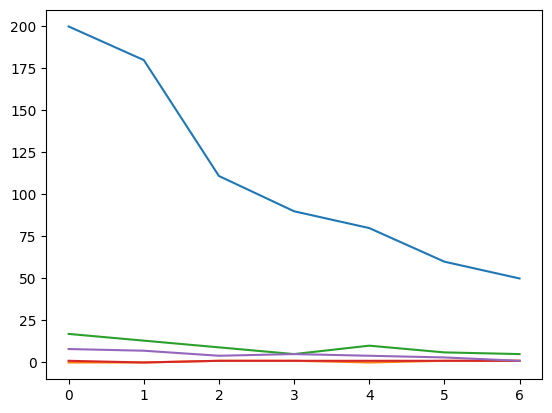

In [27]:
# read the mock data file
test_data = pd.read_csv('FinalData.csv')

# delete the ID column and the last column
test_data_processed = test_data.drop(test_data.columns[[0]], axis = 1)
test_data_new = test_data_processed.drop(test_data_processed.columns[[-1]],
                                         axis = 1)
# replace the 'Tool Correct' and 'Complete' column to 0 and 1
# 0:False, 1:True
test_data_new.replace({False: 0, True: 1}, inplace=True)

# filter data
test_data_new.drop(test_data_new[(test_data_new['Complete'] == 0)].index)
test_data_new = test_data_new.drop('Target1_StressManagement', axis=1)
test_data_new = test_data_new.drop('Target2_DecisionMaking', axis=1)
test_data_new = test_data_new.drop('Target3_Adaptability', axis=1)

# print filtered data
test_data_new

# plot data
plt.plot(test_data_new)
plt.show()

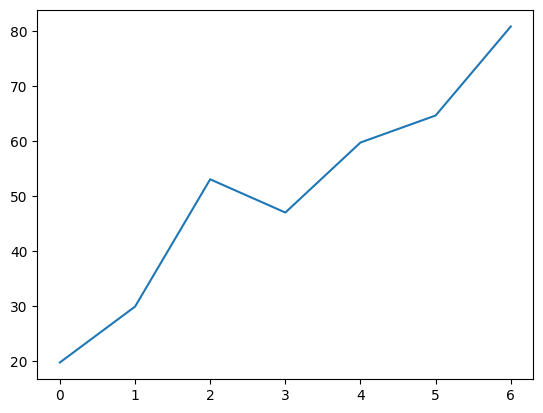

In [22]:
# only use the first target
xTest = test_data_new[['TimeResponse(s) \n|actual-standard|','ToolCorrect',
               'Wrongs\n(%)', 'Complete',
               'UserButtonPressAmount\n|actual-standard|']]

# get the output percentage of skills based on the ridge fit
ridge_prediction = ridge_regression.predict(xTest)

# print result
ridge_prediction

# plot filtered data
plt.plot(ridge_prediction)
plt.show()

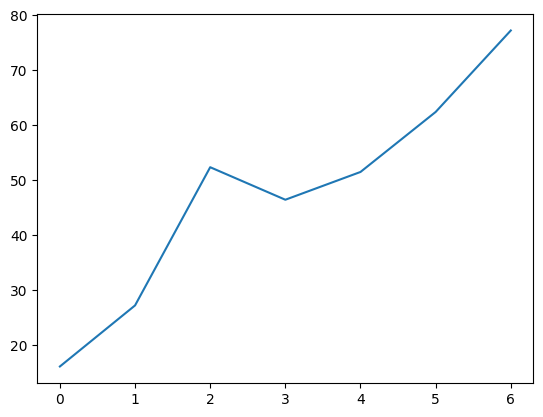

In [23]:
# use the second target as demonstration
target2 = mock_data_new[['Target2_DecisionMaking']]

# train data
from sklearn.model_selection import train_test_split
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(X, target2,
                                                   test_size = 0.2)
test_X2

# get the output percentage of skills based on the ridge fit
ridge_regression2 = ridge.fit(train_X2, train_Y2)
ridge_prediction2 = ridge_regression2.predict(xTest)

# print result
ridge_prediction2

# plot filtered data
plt.plot(ridge_prediction2)
plt.show()

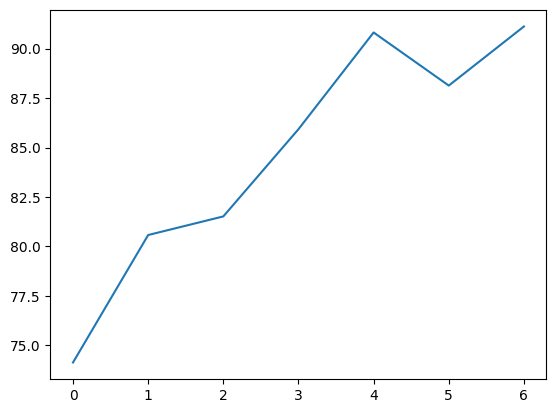

In [24]:
# use the third target as demonstration
target3 = mock_data_new[['Target3_Adaptability']]

# train data
from sklearn.model_selection import train_test_split
train_X3, test_X3, train_Y3, test_Y3 = train_test_split(X, target3,
                                                   test_size = 0.2)

# get the output percentage of skills based on the ridge fit
ridge_regression3 = ridge.fit(train_X3, train_Y3)
ridge_prediction3 = ridge_regression3.predict(xTest)

# print result
ridge_prediction3

# plot filtered data
plt.plot(ridge_prediction3)
plt.show()

In [25]:
# formatting output so it can be inserted to the database easily
    # user_id is integer type
    # data is datetime type
    # stress_management is double type with 2 decimal points
    # decision_making is double type with 2 decimal points
    # adaptability is double type with 2 decimal points
import datetime

user_id = np.array([[1], [1], [1], [1], [1], [1], [1]])
date = np.array([[datetime.date(2022, 12, 12)], [datetime.date(2023, 1, 11)], [datetime.date(2023, 1, 21)], [datetime.date(2023, 2, 18)], [datetime.date(2023, 3, 3)], [datetime.date(2023, 3, 17)], [datetime.date(2023, 3, 26)]])

output = pd.DataFrame({
    'user_id': user_id.flatten(),
    'date': date.flatten(),
    'stress_management': np.round(ridge_prediction.astype(float), 2).flatten(),
    'decision_making': np.round(ridge_prediction2.astype(float), 2).flatten(),
    'adaptability': np.round(ridge_prediction3.astype(float), 2).flatten(),
})

output

,user_id,date,stress_management,decision_making,adaptability
0,1,2022-12-12,19.70,16.15,74.14
1,1,2023-01-11,29.85,27.25,80.58
2,1,2023-01-21,53.00,52.38,81.52
3,1,2023-02-18,46.96,46.47,85.93
4,1,2023-03-03,59.69,51.52,90.82
5,1,2023-03-17,64.60,62.43,88.13
6,1,2023-03-26,80.79,77.24,91.12


In [26]:
# SQL adding to database